**Experiment** : 3


**Date** : 25.08.2020

---

**Write a python program to implement Decision Tree Classifier, visualize and evaluate the tree for the diabetes dataset using Scikit-Learn Package.**

---



Accuracy: 71.43


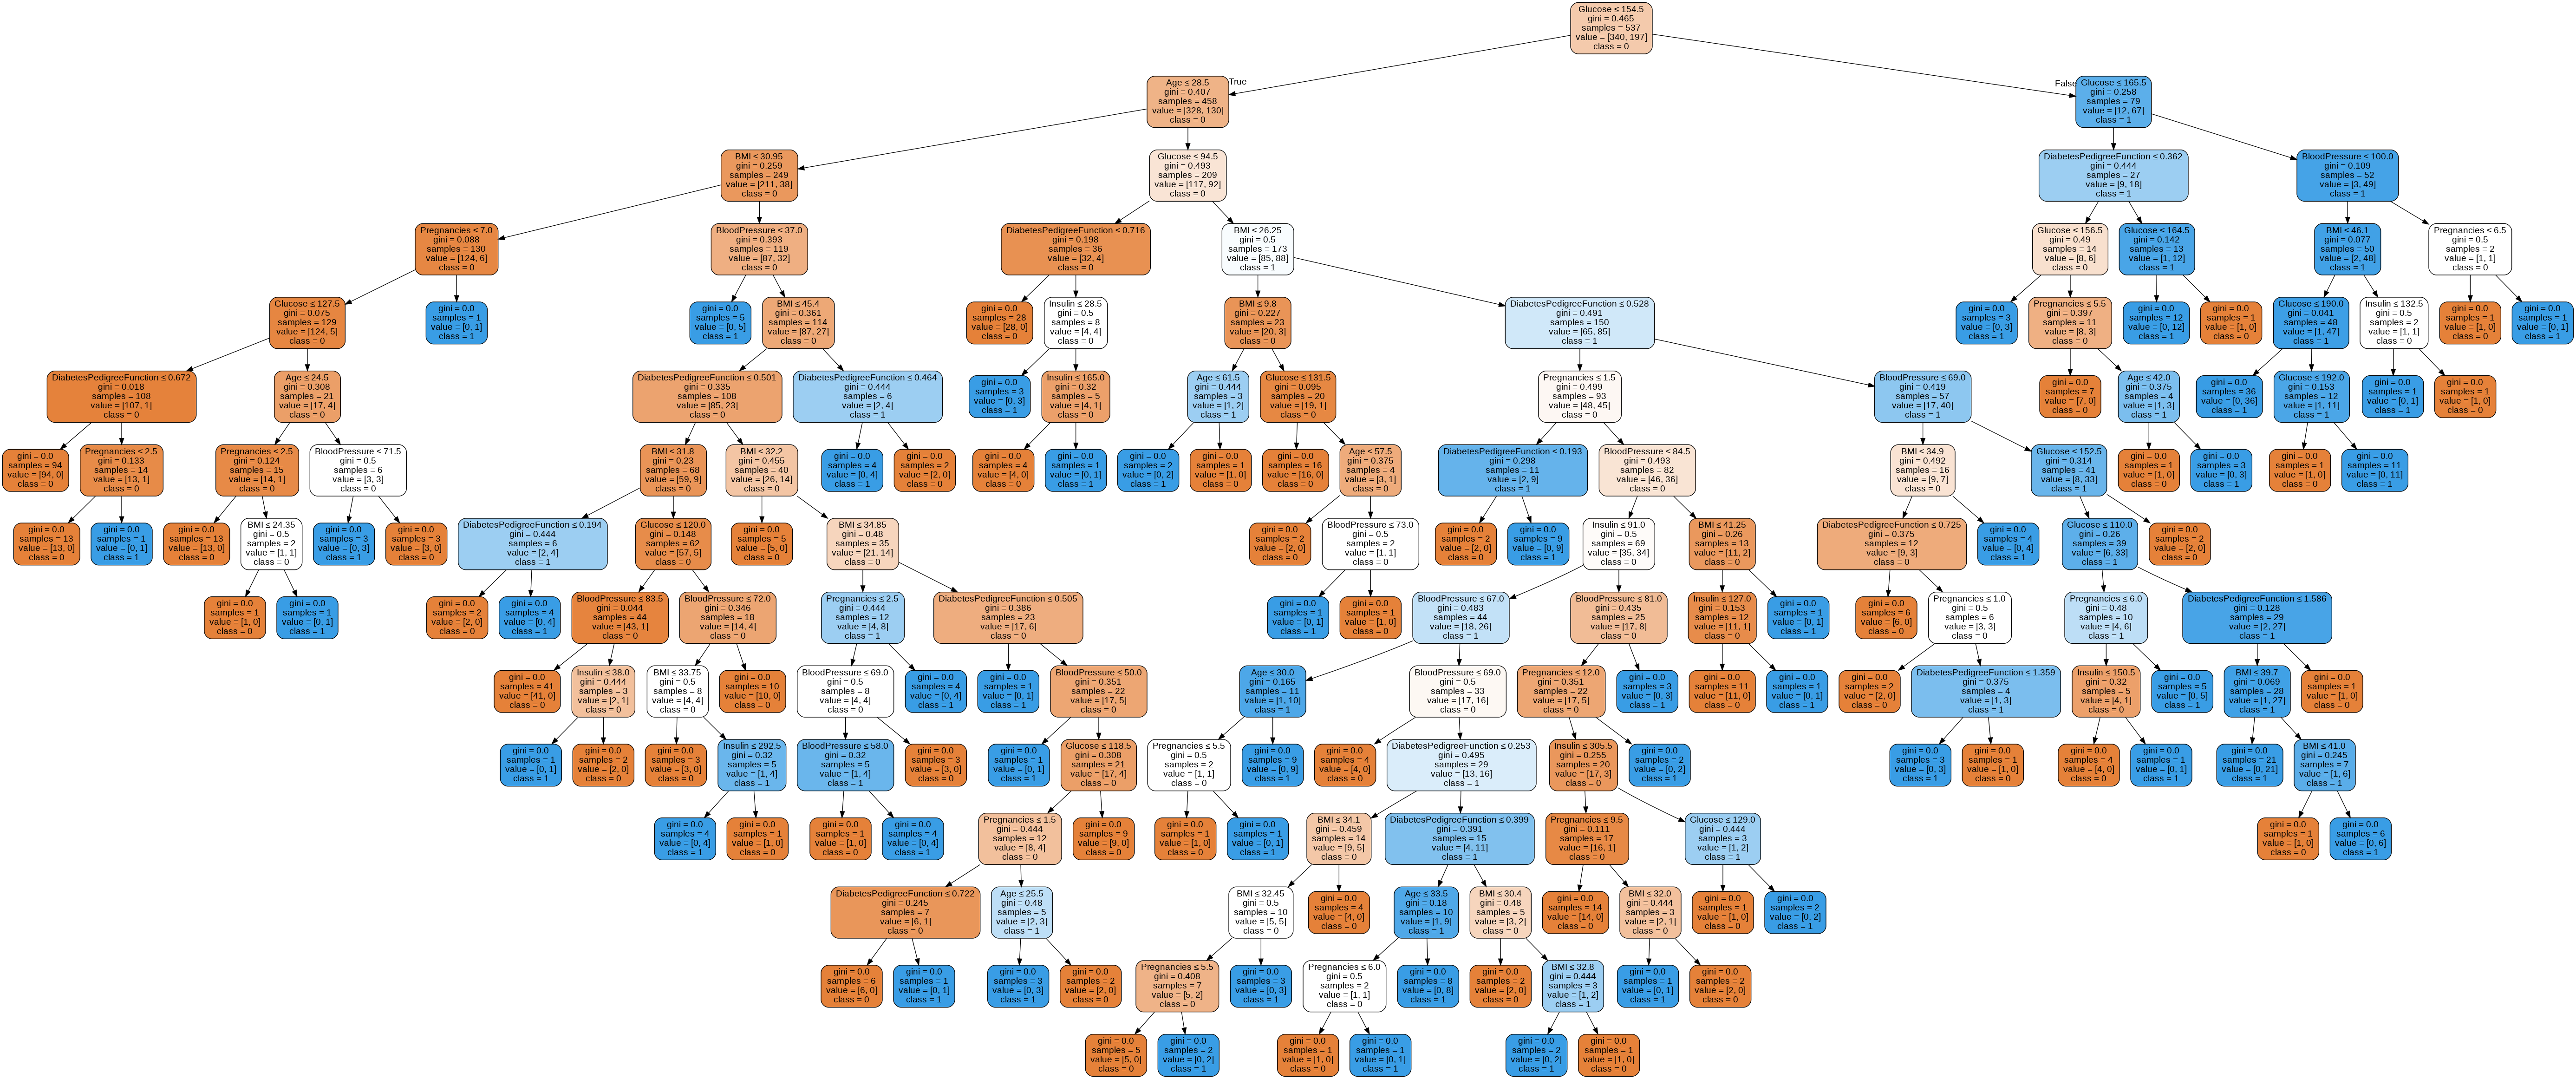

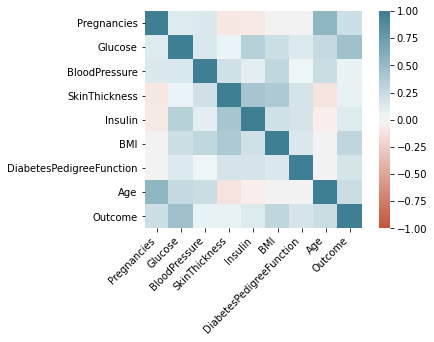

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

p =  pd.read_csv("diabetes.csv")
p.head()

import seaborn as sns
corr = p.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# feature selection
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = p[feature_cols]
y = p.Outcome

# split data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=5)

# build model
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)

# predict
y_pred = classifier.predict(X_test)
#print(y_pred)

# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)
#print(confusion_matrix(Y_test, y_pred))

# accuracy
print("Accuracy:", round(metrics.accuracy_score(Y_test,y_pred)*100,2))

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())